In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
historical = pd.read_csv("Final_Project/call_center_data_2021/Call_Type_Historical_Fields_Hourly_2021.csv")
historical.head()

,CALL_TYPE_NAME,DATE,HOUR,SL,SL_CALLS,SL_CALLS_OFFERED,ABAND_WITHIN_SL,ASA,AHT,ATT,...,Return,Flow Out,Calls Error,Other,PER_QUEUED,PER_ABAN,AV_ABAN_DELAY,SHORT_CALLS,MAX_CALLS_QUEUED,MAX_CALL_WAIT_TIME
0,CN_MIL_DERMA_QUE_CT,1/4/21,8:00 AM,50.00%,1,2,0,0:00:09,0:00:19,0:00:04,...,0,1,0,0.00%,0.00%,33.30%,0:07:02,0,1,0:06:25
1,CN_MIL_DERMA_QUE_CT,1/4/21,9:00 AM,100.00%,1,1,0,0:00:14,0:01:50,0:00:57,...,0,0,0,0.00%,100.00%,0.00%,0:00:00,0,1,0:00:14
2,CN_MIL_DERMA_QUE_CT,1/4/21,10:00 AM,100.00%,2,2,0,0:00:20,0:02:23,0:01:35,...,0,0,0,0.00%,50.00%,0.00%,0:00:00,0,1,0:00:29
3,CN_MIL_DERMA_QUE_CT,1/4/21,11:00 AM,12.50%,1,8,0,0:02:10,0:02:56,0:02:33,...,0,0,0,0.00%,85.70%,0.00%,0:00:00,0,1,0:05:42
4,CN_MIL_DERMA_QUE_CT,1/4/21,12:00 PM,0.00%,0,1,0,0:05:01,0:03:28,0:03:15,...,0,0,0,0.00%,100.00%,0.00%,0:00:00,0,1,0:05:01


In [3]:
historical.columns

Index(['CALL_TYPE_NAME', 'DATE', 'HOUR', 'SL', 'SL_CALLS', 'SL_CALLS_OFFERED',
       'ABAND_WITHIN_SL', 'ASA', 'AHT', 'ATT', 'OFFERED', 'ASSIGNED_FROM_Q',
       'Answered', 'AWT', 'Handled', 'Aband', 'Return', 'Flow Out',
       'Calls Error', 'Other', 'PER_QUEUED', 'PER_ABAN', 'AV_ABAN_DELAY',
       'SHORT_CALLS', 'MAX_CALLS_QUEUED', 'MAX_CALL_WAIT_TIME'],
      dtype='object')

In [4]:
hour = pd.DataFrame(historical.groupby("HOUR").sum()[["Answered", "OFFERED"]])

In [5]:
historical["Answered"].sum()

164682

In [6]:
hour

,Answered,OFFERED
HOUR,,
10:00 AM,22715,24281
11:00 AM,20848,23138
12:00 PM,15847,17367
1:00 PM,16426,18303
2:00 PM,19667,20679
3:00 PM,18196,19104
4:00 PM,16088,16861
5:00 PM,1633,1765
8:00 AM,10511,11332


<AxesSubplot:xlabel='HOUR'>

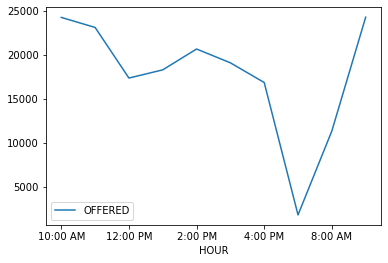

In [7]:
hour.plot(y="OFFERED")

In [8]:
year = pd.DataFrame(historical.groupby("DATE").sum()[["Answered", 'OFFERED']])

In [9]:
year["Missed"] = year["OFFERED"] - year["Answered"]
year

,Answered,OFFERED,Missed
DATE,,,
1/11/21,680,722,42
1/12/21,553,571,18
1/13/21,591,608,17
1/14/21,535,553,18
1/15/21,480,495,15
...,...,...,...
9/3/21,572,643,71
9/30/21,644,683,39
9/7/21,825,1036,211


<AxesSubplot:xlabel='DATE'>

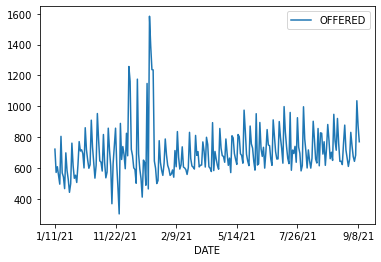

In [10]:
year.plot(y="OFFERED")

In [11]:
year["OFFERED"].describe()

count     252.000000
mean      702.900794
std       158.794619
min       302.000000
25%       608.000000
50%       666.500000
75%       770.000000
max      1584.000000
Name: OFFERED, dtype: float64

<AxesSubplot:xlabel='DATE'>

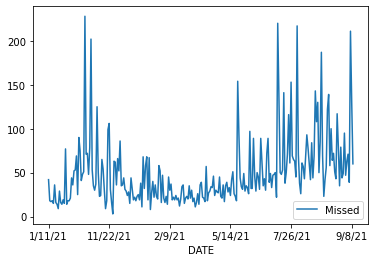

In [12]:
year.plot(y="Missed")

<AxesSubplot:xlabel='DATE'>

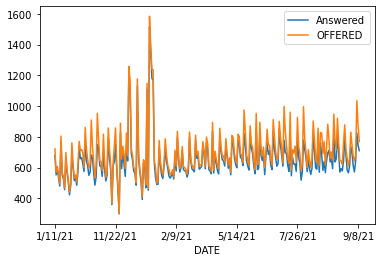

In [13]:
year.plot(y=["Answered", "OFFERED"])

In [14]:
test = pd.DataFrame(historical.groupby(["CALL_TYPE_NAME", "DATE"]).sum()["Answered"])

In [15]:
test.loc(test.index == "CN_MIL_DERMA_QUE_CT")

TypeError: unhashable type: 'numpy.ndarray'

In [16]:
historical["CALL_TYPE_NAME"].unique().tolist()

['CN_MIL_DERMA_QUE_CT',
 'CN_SCH_DERMA_QUE_CT',
 'CN_SCH_DERMA_RONA_CT',
 'CN_SCH_DERMA_SP_QUE_CT',
 'CN_SCH_NEPHR_QUE_CT',
 'CN_SCH_NEURO_QUE_CT',
 'CN_SCH_NEURO_SP_QUE_CT',
 'CN_SCH_RHEUM_QUE_CT',
 'CN_SCH_RHEUM_SP_QUE_CT',
 'CN_SKP_DERMA_QUE_CT',
 'CN_SKP_NEPHR_QUE_CT',
 'CN_SKP_NEURO_QUE_CT',
 'CN_SCH_ALLGY_QUE_CT',
 'CN_SCH_ALLGY_SP_QUE_CT',
 'CN_SCH_PAINM_QUE_CT',
 'CN_SCH_PAINM_RONA_CT',
 'CN_SCH_PAINM_SP_QUE_CT',
 'CN_SCH_PULMG_QUE_CT',
 'CN_SCH_PULMG_RONA_CT',
 'CN_SCH_PULMG_SP_QUE_CT',
 'CN_SCH_SLEEP_QUE_CT',
 'CN_SCH_SLEEP_RONA_CT',
 'CN_SCH_SLEEP_SP_QUE_CT',
 'CN_SKP_PULMG_EN_QUE_CT',
 'CN_SKP_AUDIO_EN_QUE_CT',
 'CN_SKP_UROLG_EN_QUE_CT',
 'SCH_HNS_Q_CT',
 'SCH_HNS_Q_SP_CT',
 'SCH_SUR_Q_CT',
 'SCH_SUR_Q_SP_CT',
 'SCH_URO_Q_CT',
 'SCH_URO_Q_SP_CT',
 'SCH_URO_RONA_CT',
 'CN_SCH_NEPHR_SP_QUE_CT',
 'CN_SCH_RHEUM_RONA_CT',
 'CN_SCH_ALLGY_RONA_CT',
 'CN_SCH_SLEEP_SP_RONA_CT',
 'SCH_HNS_RONA_CT',
 'SCH_SUR_RONA_CT',
 'CN_MIL_DERMA_SP_QUE_CT',
 'CN_SCH_PULMG_SP_RONA_CT',
 'CN_MIL_DE

In [17]:
historical["CALL_TYPE_NAME"].value_counts()


CN_SCH_DERMA_QUE_CT        2510
CN_SCH_SLEEP_QUE_CT        2488
CN_SCH_PAINM_QUE_CT        2478
CN_SCH_ALLGY_QUE_CT        2446
CN_SCH_NEURO_QUE_CT        2428
                           ... 
CN_SKP_PULMG_SP_RONA_CT       2
CN_SKP_DERMA_SP_RONA_CT       2
CN_SKP_NEPHR_RONA_CT          2
CN_MIL_DERMA_SP_RONA_CT       1
CN_SCH_NEPHR_SP_RONA_CT       1
Name: CALL_TYPE_NAME, Length: 70, dtype: int64

In [18]:
counts =  historical["CALL_TYPE_NAME"].value_counts()

In [19]:
replace = list(counts[counts < 100].index)

In [20]:
for x in replace:
    historical["CALL_TYPE_NAME"] = historical["CALL_TYPE_NAME"].replace(x, "Other")

In [21]:
historical["CALL_TYPE_NAME"].value_counts()

CN_SCH_DERMA_QUE_CT       2510
CN_SCH_SLEEP_QUE_CT       2488
CN_SCH_PAINM_QUE_CT       2478
CN_SCH_ALLGY_QUE_CT       2446
CN_SCH_NEURO_QUE_CT       2428
SCH_HNS_Q_CT              2428
SCH_SUR_Q_CT              2425
CN_SCH_PULMG_QUE_CT       2379
CN_SCH_NEPHR_QUE_CT       2353
SCH_URO_Q_CT              2145
CN_MIL_DERMA_QUE_CT       2031
CN_SCH_RHEUM_QUE_CT       1907
CN_SKP_DERMA_QUE_CT       1104
SCH_SUR_Q_SP_CT            768
CN_SKP_AUDIO_EN_QUE_CT     748
CN_SKP_UROLG_EN_QUE_CT     563
Other                      535
CN_SKP_NEURO_QUE_CT        514
SCH_HNS_Q_SP_CT            452
CN_SKP_NEPHR_QUE_CT        377
CN_SCH_PAINM_SP_QUE_CT     360
SCH_URO_Q_SP_CT            358
CN_SCH_SLEEP_SP_QUE_CT     355
CN_SCH_PAINM_RONA_CT       330
CN_SCH_SLEEP_RONA_CT       301
CN_SCH_DERMA_SP_QUE_CT     265
CN_SCH_ALLGY_SP_QUE_CT     260
CN_SCH_ALLGY_RONA_CT       254
CN_SKP_PULMG_EN_QUE_CT     241
SCH_SUR_RONA_CT            230
CN_SCH_NEPHR_SP_QUE_CT     212
CN_SCH_PULMG_RONA_CT       207
CN_SCH_P

In [22]:
agent.groupby("Hour").count()

NameError: name 'agent' is not defined

In [23]:
agent = pd.read_csv("Final_Project/call_center_data_2021/Agent_State_Summary_Hourly_2021.csv")
agent.head()

,Agent_ID,Date,Hour,GROUP_NAME,CALLS_ANSWERED,INTERNAL_CALS,EXTERNAL_OUTGOING_CALLS,RONA,LOGGED_ON_TIME,AVAILABLE_TIME,...,EXT_OUT_CALLS_TALK_TIME,AVG_TALK_TIME_EXTERNAL,HOLD_TIME,PER_HOLD,INTERNAL_CALLS_TIME,AVG_TALK_TIME_INTERNAL,PER_INTERNAL,HANDLED_CALLS_TIME,AVG_HANDLE_TIME,BUSY_OTHER_TIME
0,8,1/4/21,8:00 AM,CN_SCH_SPECC_POD_1_SG,4,0,0,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:14:24,0:00:00,0:00:00
1,8,1/4/21,8:00 AM,CN_SCH_SPECC_SP_POD_1_SG,0,0,0,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0:14:24
2,8,1/4/21,8:00 AM,SCH_CCM01.Cisco_Voice.defa.72419,0,0,2,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0:14:24
3,3,1/4/21,8:00 AM,CN_SCH_SPECC_EN_SG,3,2,0,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,5.22%,0:00:00,0:00:00,2.32%,0:14:24,0:00:00,0:00:00
4,3,1/4/21,8:00 AM,CN_SCH_SPECC_SP_SG,1,2,0,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,0.11%,0:00:00,0:00:00,0.68%,0:00:00,0:00:00,0:14:24


In [24]:
agent.dtypes

Agent_ID                    int64
Date                       object
Hour                       object
GROUP_NAME                 object
CALLS_ANSWERED              int64
INTERNAL_CALS               int64
EXTERNAL_OUTGOING_CALLS     int64
RONA                        int64
LOGGED_ON_TIME             object
AVAILABLE_TIME             object
PER_AVAIL                  object
NOT_READY                  object
PER_NOT_READY              object
WORK_TIME                  object
PER_WORK_TIME              object
TALK_TIME                  object
PER_TALK_TIME              object
HANDLED_CALLS_TALK_TIME    object
AVG_TALK_TIME              object
TALK_TIME_OUT              object
PER_TALK_TIME_OUT          object
EXT_OUT_CALLS_TALK_TIME    object
AVG_TALK_TIME_EXTERNAL     object
HOLD_TIME                  object
PER_HOLD                   object
INTERNAL_CALLS_TIME        object
AVG_TALK_TIME_INTERNAL     object
PER_INTERNAL               object
HANDLED_CALLS_TIME         object
AVG_HANDLE_TIM

In [25]:
agent["Hour"].value_counts()

1:00 PM     9484
9:00 AM     9470
12:00 PM    9461
11:00 AM    9413
10:00 AM    9363
2:00 PM     8839
4:00 PM     8490
3:00 PM     8480
8:00 AM     7673
5:00 PM     6344
7:00 AM     1024
6:00 PM      101
10:00 PM      26
11:00 PM      26
8:00 PM       26
9:00 PM       26
7:00 PM       26
12:00 AM      23
1:00 AM       23
2:00 AM       23
3:00 AM       23
4:00 AM       23
5:00 AM       23
6:00 AM       23
Name: Hour, dtype: int64

In [26]:
agent.groupby("Hour").count()

,Agent_ID,Date,GROUP_NAME,CALLS_ANSWERED,INTERNAL_CALS,EXTERNAL_OUTGOING_CALLS,RONA,LOGGED_ON_TIME,AVAILABLE_TIME,PER_AVAIL,...,EXT_OUT_CALLS_TALK_TIME,AVG_TALK_TIME_EXTERNAL,HOLD_TIME,PER_HOLD,INTERNAL_CALLS_TIME,AVG_TALK_TIME_INTERNAL,PER_INTERNAL,HANDLED_CALLS_TIME,AVG_HANDLE_TIME,BUSY_OTHER_TIME
Hour,,,,,,,,,,,,,,,,,,,,,
10:00 AM,9363,9363,9363,9363,9363,9363,9363,9363,9363,9363,...,9363,9363,9363,9363,9363,9363,9363,9363,9363,9363
10:00 PM,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
11:00 AM,9413,9413,9413,9413,9413,9413,9413,9413,9413,9413,...,9413,9413,9413,9413,9413,9413,9413,9413,9413,9413
11:00 PM,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
12:00 AM,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
12:00 PM,9461,9461,9461,9461,9461,9461,9461,9461,9461,9461,...,9461,9461,9461,9461,9461,9461,9461,9461,9461,9461
1:00 AM,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
1:00 PM,9484,9484,9484,9484,9484,9484,9484,9484,9484,9484,...,9484,9484,9484,9484,9484,9484,9484,9484,9484,9484
2:00 AM,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23


In [27]:
agent["CALLS_ANSWERED"].sum()

162602

In [28]:
agent[agent["Hour"] == "7:00 AM"].sum()["CALLS_ANSWERED"]

0

In [29]:
agent.groupby("Hour").sum()

,Agent_ID,CALLS_ANSWERED,INTERNAL_CALS,EXTERNAL_OUTGOING_CALLS,RONA
Hour,,,,,
10:00 AM,91445,22504,6162,1101,302
10:00 PM,310,0,0,0,0
11:00 AM,91933,20559,5895,1350,280
11:00 PM,310,0,0,0,0
12:00 AM,262,0,0,0,0
12:00 PM,91423,15577,4168,1719,203
1:00 AM,262,0,0,0,0
1:00 PM,91105,16208,4170,1795,184
2:00 AM,262,0,0,0,0


In [30]:
agent.columns

Index(['Agent_ID', 'Date', 'Hour', 'GROUP_NAME', 'CALLS_ANSWERED',
       'INTERNAL_CALS', 'EXTERNAL_OUTGOING_CALLS', 'RONA', 'LOGGED_ON_TIME',
       'AVAILABLE_TIME', 'PER_AVAIL', 'NOT_READY', 'PER_NOT_READY',
       'WORK_TIME', 'PER_WORK_TIME', 'TALK_TIME', 'PER_TALK_TIME',
       'HANDLED_CALLS_TALK_TIME', 'AVG_TALK_TIME', 'TALK_TIME_OUT',
       'PER_TALK_TIME_OUT', 'EXT_OUT_CALLS_TALK_TIME',
       'AVG_TALK_TIME_EXTERNAL', 'HOLD_TIME', 'PER_HOLD',
       'INTERNAL_CALLS_TIME', 'AVG_TALK_TIME_INTERNAL', 'PER_INTERNAL',
       'HANDLED_CALLS_TIME', 'AVG_HANDLE_TIME', 'BUSY_OTHER_TIME'],
      dtype='object')

In [31]:
agent_not = pd.read_csv("Final_Project/call_center_data_2021/Agent_Not_Ready_Detail_2021.csv")
agent_not.head()

,Agent_ID,LOG_ON_DATE_TIME,LOG_ON_DURATION,REASON_CODE,DURATION,LOG_ON_DUR_PER,TOTAL_TIME_NOT_READU,NOT_READY_PER
0,11,1/4/21 7:47,8:24:00,Break[10003],6:52:00,1.35%,21:38:00,8.40%
1,11,1/4/21 7:47,8:24:00,Extended Wrap Up[10048],1:43:00,0.34%,21:38:00,2.10%
2,11,1/4/21 7:47,8:24:00,Go To Logout[10025],0:05:00,0.02%,21:38:00,0.10%
3,11,1/4/21 7:47,8:24:00,Lunch[10001],59:50:00,11.79%,21:38:00,73.30%
4,11,1/4/21 7:47,8:24:00,Undefined[0],13:08:00,2.59%,21:38:00,16.10%


In [32]:
agent_not

,Agent_ID,LOG_ON_DATE_TIME,LOG_ON_DURATION,REASON_CODE,DURATION,LOG_ON_DUR_PER,TOTAL_TIME_NOT_READU,NOT_READY_PER
0,11,1/4/21 7:47,8:24:00,Break[10003],6:52:00,1.35%,21:38:00,8.40%
1,11,1/4/21 7:47,8:24:00,Extended Wrap Up[10048],1:43:00,0.34%,21:38:00,2.10%
2,11,1/4/21 7:47,8:24:00,Go To Logout[10025],0:05:00,0.02%,21:38:00,0.10%
3,11,1/4/21 7:47,8:24:00,Lunch[10001],59:50:00,11.79%,21:38:00,73.30%
4,11,1/4/21 7:47,8:24:00,Undefined[0],13:08:00,2.59%,21:38:00,16.10%
...,...,...,...,...,...,...,...,...
18472,16,12/30/21 8:00,0:00:00,Extended Wrap Up[10048],1:51:00,0.44%,21:10:00,2.30%
18473,16,12/30/21 8:00,0:00:00,Go To Logout[10025],0:02:00,0.01%,21:10:00,0.00%
18474,16,12/30/21 8:00,0:00:00,Lunch[10001],0:31:00,14.41%,21:10:00,74.60%
18475,16,12/30/21 8:00,0:00:00,Outbound Calls[32],0:38:00,0.15%,21:10:00,0.80%


In [33]:
agent_not.columns

Index(['Agent_ID', 'LOG_ON_DATE_TIME', 'LOG_ON_DURATION', 'REASON_CODE',
       'DURATION', 'LOG_ON_DUR_PER', 'TOTAL_TIME_NOT_READU', 'NOT_READY_PER'],
      dtype='object')

In [34]:
agent_not["REASON_CODE"].value_counts()

Undefined[0]                 3952
Go To Logout[10025]          3117
Break[10003]                 2908
Extended Wrap Up[10048]      2878
Lunch[10001]                 2133
RONA[32767]                  1027
Administration[11043]         817
[50003]                       449
Outbound Calls[32]            379
Computer Issues[10030]        228
Meeting[10007]                224
Training[10005]               171
CTI Failure[50002]             74
Member Facing Work[11494]      61
[999]                          50
[32762]                         8
Missed Tasks[50010]             1
Name: REASON_CODE, dtype: int64

In [47]:
agent.loc[(agent["GROUP_NAME"] != "SCH_CCM01.Cisco_Voice.defa.72419") & (agent["GROUP_NAME"] != "CN_SCH_SPECC_SP_POD_1_SG")]

,Agent_ID,Date,Hour,GROUP_NAME,CALLS_ANSWERED,INTERNAL_CALS,EXTERNAL_OUTGOING_CALLS,RONA,LOGGED_ON_TIME,AVAILABLE_TIME,...,EXT_OUT_CALLS_TALK_TIME,AVG_TALK_TIME_EXTERNAL,HOLD_TIME,PER_HOLD,INTERNAL_CALLS_TIME,AVG_TALK_TIME_INTERNAL,PER_INTERNAL,HANDLED_CALLS_TIME,AVG_HANDLE_TIME,BUSY_OTHER_TIME
0,8,1/4/21,8:00 AM,CN_SCH_SPECC_POD_1_SG,4,0,0,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:14:24,0:00:00,0:00:00
1,8,1/4/21,8:00 AM,CN_SCH_SPECC_SP_POD_1_SG,0,0,0,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0:14:24
2,8,1/4/21,8:00 AM,SCH_CCM01.Cisco_Voice.defa.72419,0,0,2,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0:14:24
3,3,1/4/21,8:00 AM,CN_SCH_SPECC_EN_SG,3,2,0,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,5.22%,0:00:00,0:00:00,2.32%,0:14:24,0:00:00,0:00:00
4,3,1/4/21,8:00 AM,CN_SCH_SPECC_SP_SG,1,2,0,0,0:28:48,0:14:24,...,0:00:00,0:00:00,0:00:00,0.11%,0:00:00,0:00:00,0.68%,0:00:00,0:00:00,0:14:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88428,17,12/30/21,4:00 PM,CN_SCH_SPECC_SP_SG,0,0,0,0,0:57:36,0:43:12,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0:14:24
88429,17,12/30/21,4:00 PM,SCH_CCM01.Cisco_Voice.defa.72419,0,0,0,0,0:57:36,0:43:12,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0:14:24
88430,17,12/30/21,5:00 PM,CN_SCH_SPECC_EN_SG,0,0,0,0,0:00:00,0:00:00,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0:00:00
88431,17,12/30/21,5:00 PM,CN_SCH_SPECC_SP_SG,0,0,0,0,0:00:00,0:00:00,...,0:00:00,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0.00%,0:00:00,0:00:00,0:00:00


In [36]:
agent_not.groupby("Agent_ID").mean()

/Users/evanbruno/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Agent_ID
1
2
3
4
5
6
7
8
9
